In [1]:
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OrdinalEncoder, LabelEncoder

In [109]:
penguins_df = sns.load_dataset('penguins')

In [110]:
penguins_df = penguins_df.dropna()

In [111]:
minmax = MinMaxScaler()

In [122]:
minmax.fit(np.array(penguins_df['body_mass_g']).reshape(-1,1))      # find min and max
transformed = minmax.transform(np.array(penguins_df['body_mass_g']).reshape(-1,1))  # transform the distribution / normalise


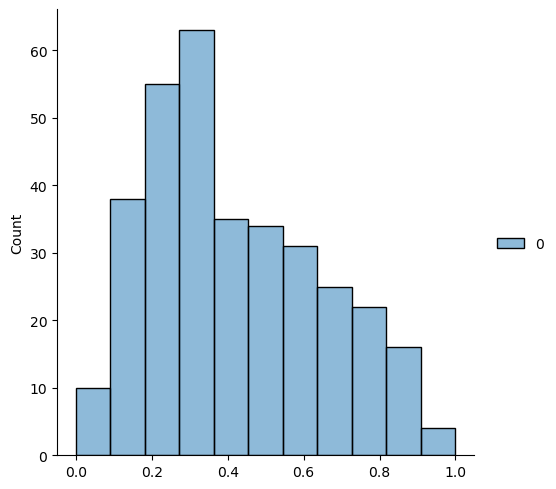

In [123]:
sns.displot(transformed)

In [84]:
ma_df = pd.read_csv("ma_round3.csv")

In [50]:
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [85]:
categorical = ma_df.select_dtypes('object')
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [96]:
categorical.effective_to_date.unique()

array(['2/18/11', '1/18/11', '2/10/11', '1/11/11', '1/17/11', '2/14/11',
       '2/24/11', '1/19/11', '1/4/11', '1/2/11', '2/7/11', '1/31/11',
       '1/26/11', '2/28/11', '1/16/11', '2/26/11', '2/23/11', '1/15/11',
       '2/2/11', '2/15/11', '1/24/11', '2/21/11', '2/22/11', '1/7/11',
       '1/28/11', '2/8/11', '2/12/11', '2/20/11', '1/5/11', '2/19/11',
       '1/3/11', '2/3/11', '1/22/11', '1/23/11', '2/5/11', '2/13/11',
       '1/25/11', '2/16/11', '2/1/11', '1/27/11', '1/12/11', '1/20/11',
       '2/6/11', '2/11/11', '1/21/11', '1/29/11', '1/9/11', '2/9/11',
       '2/27/11', '1/1/11', '2/17/11', '2/25/11', '1/13/11', '1/6/11',
       '2/4/11', '1/14/11', '1/10/11', '1/8/11', '1/30/11'], dtype=object)

In [87]:
#check for nulls to drop
nan_count = categorical.isna().sum().sum()
nan_count

#check for multicorrelation
corr_matrix = ma_df.corr()
corr_matrix

/var/folders/41/cwvbc7bx649ccn9bbdkzvjfw0000gn/T/ipykernel_98041/742084189.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ma_df.corr()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


In [90]:
# how did the others do it with effective_to_date??

#OrdinalEncoder

educ_categories = ['college','high school or below','bachelor','master','doctor']
month_cat = ['jan','feb']
vsize_cat = ['small','medsize','large']
roffert_cat = ['offer1','offer2','offer3','offer4']
coverage = ['basic','extended','premium']

encoder = OrdinalEncoder(categories=[educ_categories,month_cat,vsize_cat,roffert_cat,coverage])

input_array = np.column_stack((
    ma_df['education'], ma_df['month'], ma_df['vehicle_size'], ma_df['renew_offer_type'],ma_df['coverage']))
    
#enc_ordinals = encoder.fit_transform(input_array)

# is it ok to have decimal numbers for values??





In [94]:
#LabelEncoder & ma_df - transformation

for col in ["response","region", "gender", "location_code","marital_status","sales_channel","employment_status","policy","policy_type","vehicle_class"]:
    ma_df[col] = LabelEncoder().fit_transform(ma_df[col])
    
for v in ['education','month','vehicle_size','renew_offer_type','coverage']:
    ma_df[v] = encoder.fit_transform(input_array)


In [95]:
ma_df.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,4809,0,0.0,0.0,2/18/11,0.0,1,1,48029,...,52,0,9,0,2,0.0,0,292,0,0.0
1,3,2228,0,0.0,0.0,1/18/11,0.0,4,0,92260,...,26,0,1,1,5,0.0,2,744,0,0.0
2,1,14947,0,2.0,2.0,2/10/11,2.0,1,1,22139,...,31,0,2,1,5,2.0,2,480,4,2.0
3,2,22332,1,0.0,0.0,1/11/11,0.0,1,1,49078,...,3,0,2,0,2,0.0,1,484,0,0.0
4,2,9025,0,2.0,2.0,1/17/11,2.0,2,0,23675,...,31,0,7,1,4,2.0,1,707,0,2.0


array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'response'}>,
        <Axes: title={'center': 'employment_status'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'location_code'}>,
        <Axes: title={'center': 'marital_status'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'policy_type'}>,
        <Axes: title={'center': 'policy'}>,
        <Axes: title={'center': 'sales_channel'}>],
       [<Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'vehicle_class'}>, <Axes: >, <Axes: >]],
      dtype=object)

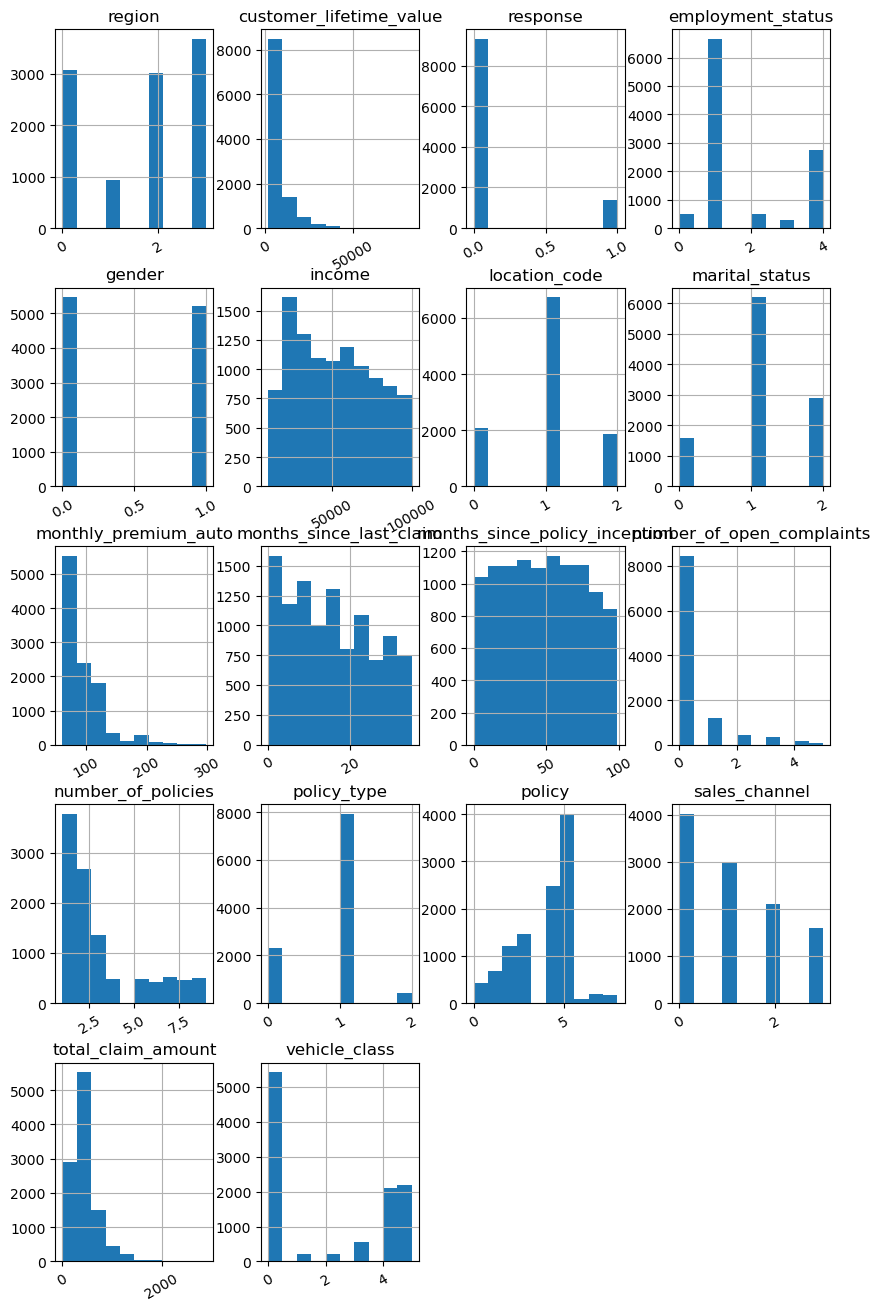

In [102]:
#optional task

numericals = ma_df.select_dtypes('int64')
numericals.hist(figsize=(10,16), xrot = 30)

In [104]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   region                         10689 non-null  int64
 1   customer_lifetime_value        10689 non-null  int64
 2   response                       10689 non-null  int64
 3   employment_status              10689 non-null  int64
 4   gender                         10689 non-null  int64
 5   income                         10689 non-null  int64
 6   location_code                  10689 non-null  int64
 7   marital_status                 10689 non-null  int64
 8   monthly_premium_auto           10689 non-null  int64
 9   months_since_last_claim        10689 non-null  int64
 10  months_since_policy_inception  10689 non-null  int64
 11  number_of_open_complaints      10689 non-null  int64
 12  number_of_policies             10689 non-null  int64
 13  policy_type     

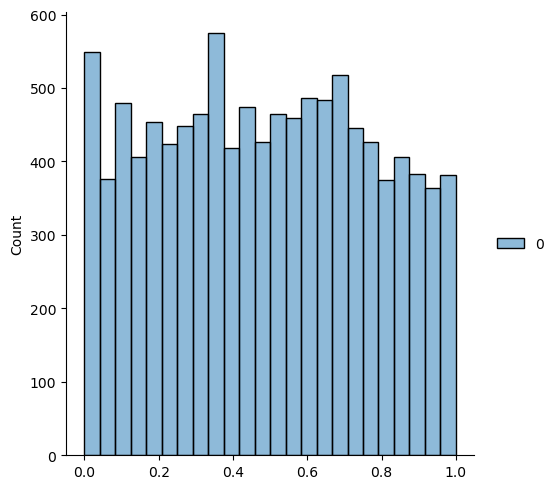

In [147]:
varA = ma_df['months_since_policy_inception']
varB = ma_df['customer_lifetime_value']

#1
minmax = MinMaxScaler()
trans_A = minmax.fit_transform(np.array(ma_df['months_since_policy_inception']).reshape(-1,1))      # find min and max and transform

sns.displot(trans_A)

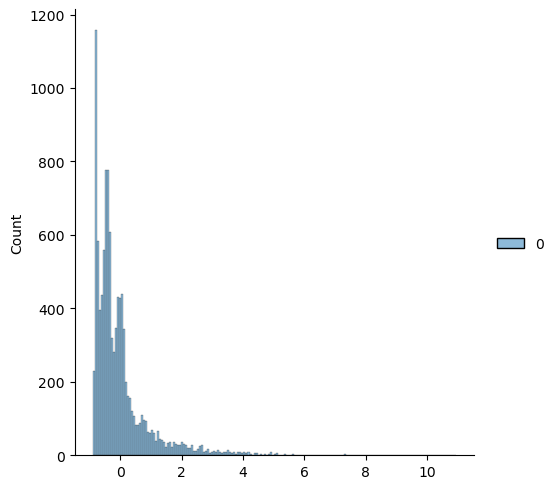

In [148]:
#2 StandardScaler

stsc = StandardScaler()
trans_B = stsc.fit_transform(np.array(varB).reshape(-1,1)) # find std and mean & transform

sns.displot(trans_B)

In [149]:
mean_B = np.mean(trans_B)
mean_B

1.595380826854e-17

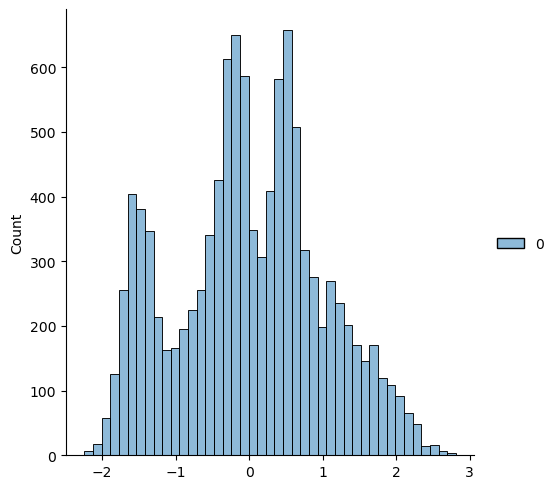

In [152]:
#PowerTransformer

powtr = PowerTransformer()
trans_PB = powtr.fit_transform(np.array(varB).reshape(-1,1))

sns.displot(trans_PB)

In [153]:
mean_vb = np.mean(trans_PB)
mean_vb

4.18787467049175e-15

In [154]:
std_vb = np.std(trans_PB)
std_vb

1.0000000000000002

<Axes: ylabel='Count'>

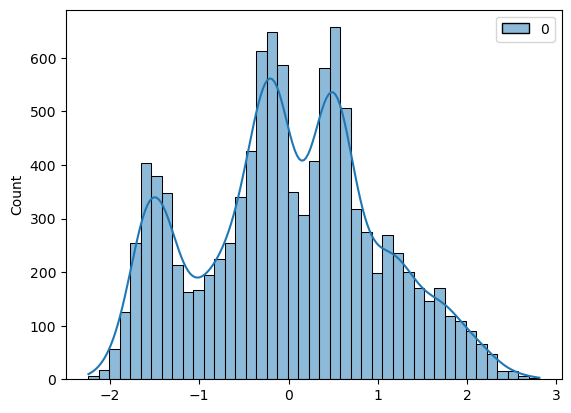

In [159]:
sns.histplot(trans_PB, kde=True, color='g')